In [1]:
import numpy as np
import matplotlib.pyplot as plt
import util

In [2]:
from sklearn.linear_model import LogisticRegression as sklogreg
from sklearn.model_selection import train_test_split

In [3]:
#from LogisticRegression_key import LogisticRegression
from LogisticRegression import LogisticRegression

In [4]:
# Generate a 2d linearly separable dataset using a multivariate normal distribution. Note that it's important that the distribution is normal
# for the sigmoid function to be the appropriate choice for the hypothesis. I couldn't seem to get the logreg_intro_train/test.csv datasets to work.
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

In [5]:
# Use scikit-learn split_train_test to divide up the generated data.
x_train, x_test, y_train, y_test = train_test_split(features, labels, train_size=.7, random_state=1)

In [6]:
# Add intercept for x_train
intercept_train = np.ones((x_train.shape[0], 1))
x_train = np.hstack((intercept_train, x_train))

# Add intercept for x_test
intercept_test = np.ones((x_test.shape[0], 1))
x_test = np.hstack((intercept_test, x_test))

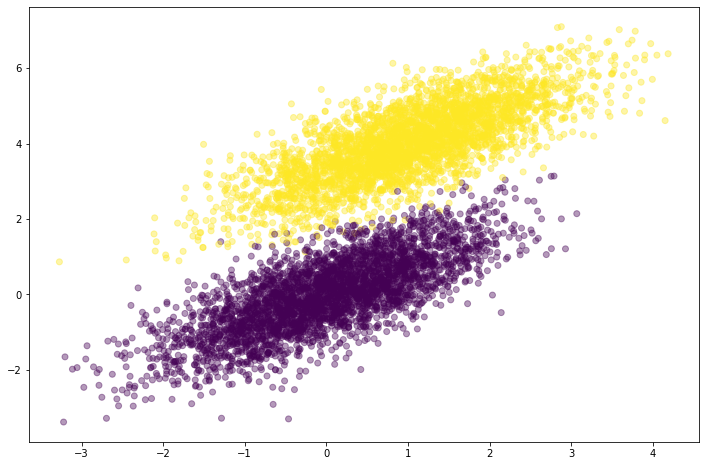

In [7]:
# Plot the train set.
plt.figure(figsize=(12,8))
plt.scatter(x_train[:, 1], x_train[:, 2],
            c = y_train, alpha = .4)
plt.show()

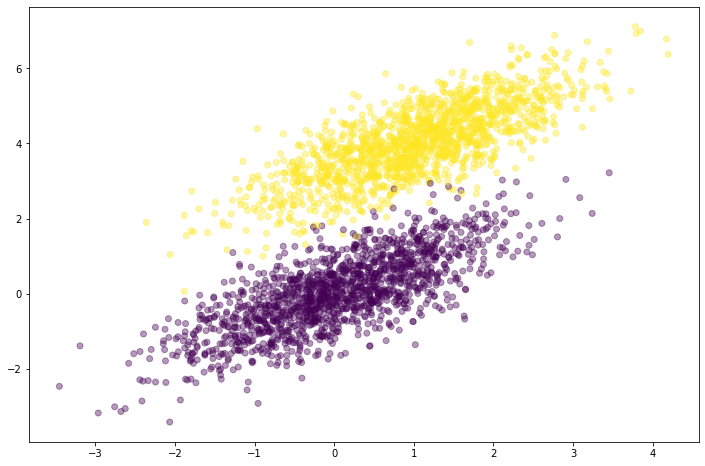

In [8]:
# Plot the test set.
plt.figure(figsize=(12,8))
plt.scatter(x_test[:, 1], x_test[:, 2],
            c = y_test, alpha = .4)
plt.show()

In [9]:
# Load in the train and test datasets.
#x_train, y_train = util.load_dataset("../data/logreg_intro_train.csv", add_intercept=True)
#x_test, y_test = util.load_dataset("../data/logreg_intro_test.csv", add_intercept=True)

In [10]:
# Plot the training set. You can see the data is linearly separable.
#plt.figure()
#plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
#plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2)
#plt.show()

In [11]:
# Plot the test set.
#plt.figure()
#plt.plot(x_test[y_test == 1, -2], x_test[y_test == 1, -1], 'bx', linewidth=2)
#plt.plot(x_test[y_test == 0, -2], x_test[y_test == 0, -1], 'go', linewidth=2)
#plt.show()

In [12]:
# Define our function g(z) = h(theta * x). In this case the hypothesis h is the sigmoid function.
g = lambda z: 1 / (1 + np.exp(-z))
# Train our Newton's Method Logistic Regression classifier. We are using the log loss function that we worked with in the notes.
logreg_model = LogisticRegression(g=g, eps=1e-5, learning_rate=1e-1)
logreg_model.fit(x_train, y_train)

In [13]:
y_preds = logreg_model.predict(x_test)

In [14]:
# Use np.savetxt to save predictions on eval set to pred_path
np.savetxt("output/logreg_intro", y_preds)

ValueError: Expected 1D or 2D array, got 0D array instead

In [ ]:
# Fit a sklearn logreg model with an intercept, and no regularization ("penalty").
sklearn = sklogreg(fit_intercept=True, penalty='none')
sklearn.fit(x_train, y_train)
# Check its theta weights. For some reason, the intercept seems to be about half what it should be, so the following sklearn separator plot
# may not be accurate.
print("Theta from sklearn logreg:", sklearn.coef_)

In [ ]:
# Plot the decision line on top of the valid data.
#y_predict = logreg_model.predict(test_x)
util.plot(x_test, y_test, sklearn.coef_[0], '{}.png'.format("output/logreg_intro"), "Separator for sklearn")
util.plot(x_test, y_test, logreg_model.theta, '{}.png'.format("output/logreg_intro"), "Separator for Our Model")

In [ ]:
print('Accuracy from scratch: {0}'.format((y_preds == y_test).sum().astype(float) / len(y_preds)))
print('Accuracy from sk-learn: {0}'.format(sklearn.score(x_test, y_test)))